In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("white")

import missingno as msno
import plotly.express as px
from matplotlib import cm
from matplotlib import style
from matplotlib import font_manager
from matplotlib import rc

rc('font', family='Arial Unicode MS')
plt.rcParams['font.size'] = 15

import warnings
warnings.filterwarnings("ignore")

# 1. 데이터 로드

In [2]:
raw_data = pd.read_csv('insurance_fraud_detect_data.csv', index_col=0)
raw_data.head()

,fraud_YN,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24
0,0,2,1,3,0,2,0,100,2,0,...,0,1,0,0,1,0,0,0,-1,0
1,0,1,0,4,0,4,0,0,3,1,...,0,1,1,1,2,1,1,1,0,1
2,0,1,0,4,1,4,0,100,3,1,...,12925040,3,1,0,2,1,1,1,0,1
3,0,3,1,3,0,4,0,0,2,0,...,0,3,1,0,1,0,0,0,-1,0
4,0,1,0,1,0,1,0,100,1,0,...,1209410,1,0,0,2,0,0,0,-1,0


# 2. 데이터 탐색

In [3]:
raw_data.columns

Index(['fraud_YN', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24'],
      dtype='object')

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16000 entries, 0 to 15999
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fraud_YN  16000 non-null  int64  
 1   x1        16000 non-null  int64  
 2   x2        16000 non-null  int64  
 3   x3        16000 non-null  int64  
 4   x4        16000 non-null  int64  
 5   x5        16000 non-null  int64  
 6   x6        16000 non-null  int64  
 7   x7        16000 non-null  int64  
 8   x8        16000 non-null  int64  
 9   x9        16000 non-null  int64  
 10  x10       16000 non-null  int64  
 11  x11       16000 non-null  int64  
 12  x12       16000 non-null  int64  
 13  x13       16000 non-null  int64  
 14  x14       16000 non-null  float64
 15  x15       16000 non-null  int64  
 16  x16       16000 non-null  int64  
 17  x17       16000 non-null  int64  
 18  x18       16000 non-null  int64  
 19  x19       16000 non-null  int64  
 20  x20       16000 non-null  in

<AxesSubplot:>

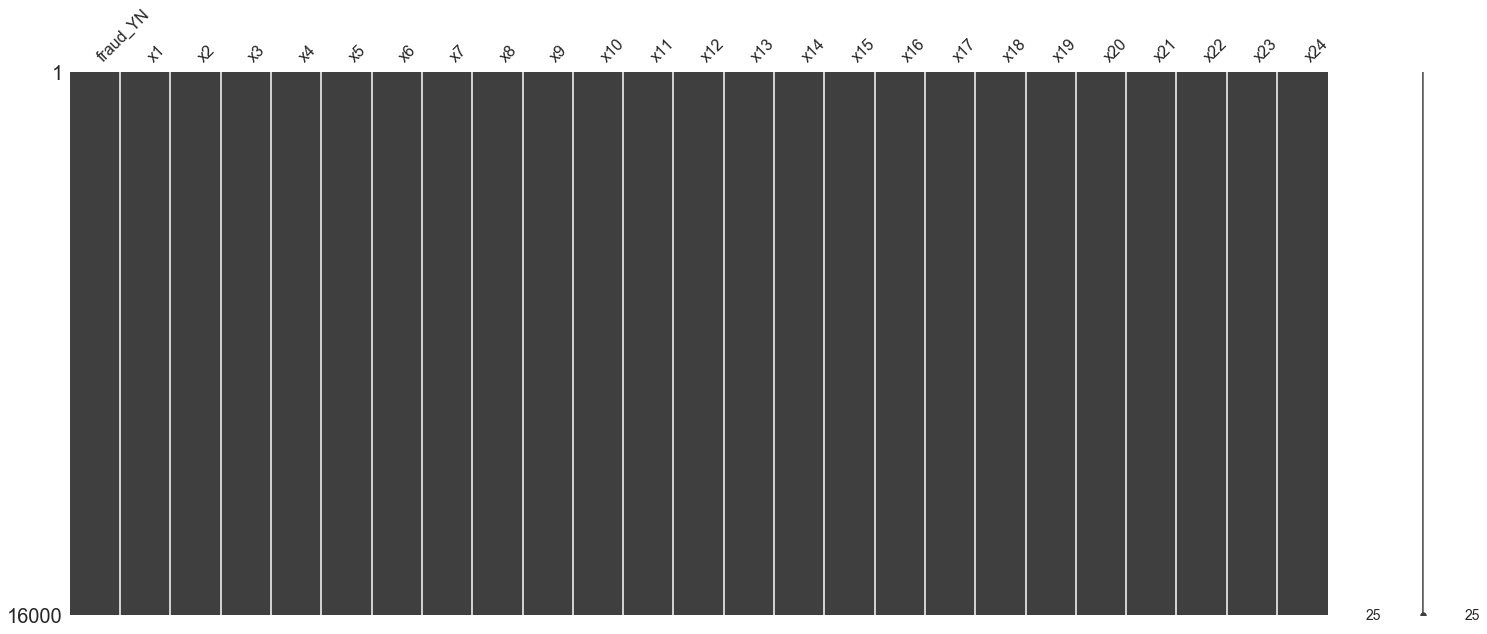

In [5]:
msno.matrix(raw_data)

In [6]:
# fraud_YN == 1 사기에 해당하는 경우
len(raw_data[raw_data['fraud_YN'] != 0])

41

In [7]:
raw_data['fraud_YN'].unique()

array([0, 1])

In [8]:
# x8
raw_data[raw_data['fraud_YN'] != 0]['x8'].unique()

array([3, 1, 2])

In [9]:
# x10 == 1 3년 이상된 차량(할인)
len(raw_data[raw_data['x10'] != 0])

1281

In [10]:
# x9 == 1 멤버십
len(raw_data[raw_data['x9'] != 0])

2606

In [11]:
# x8
raw_data[raw_data['fraud_YN'] == 1]['x8'].value_counts()

1    25
3     9
2     7
Name: x8, dtype: int64

In [12]:
# b2b == 0 개인 고객 / b2b == 2 법인 구성원
raw_data['x6'].unique()

array([0, 2])

In [13]:
# 9. x14
len(raw_data[raw_data['x14']==0])

6006

In [14]:
# 10. x15
len(raw_data[raw_data['x15']==0])

10424

### x21
    - x21 == 0 알수없음
    - x21 == 1 출동
    - x21 == 2 미출동
    
### x22
    - x22 == 0 알수없음
    - x22 == 1 신고
    - x22 == 2 미신고

In [15]:
len(raw_data[(raw_data['x21'] == 1) & (raw_data['x22'] == 1)])

3595

In [16]:
len(raw_data[(raw_data['x21'] == 2) & (raw_data['x22'] == 1)])

1077

In [17]:
len(raw_data[(raw_data['x21'] == 0) & (raw_data['x22'] == 0)])

11325

In [18]:
len(raw_data[(raw_data['x21'] == 1) & (raw_data['x22'] == 2)])

0

In [19]:
# x12
print(len(raw_data[raw_data['x12'] == 1]), # 2~5시간
      len(raw_data[raw_data['x12'] == 2]), # 6~9시간
      len(raw_data[raw_data['x12'] == 3]), # 10~36시간
      len(raw_data[raw_data['x12'] == 4]), # 36시간 초과
      len(raw_data[raw_data['x12'] == 5])) # 2시간 미만

5727 3234 4858 1605 576


In [20]:
# x5 (1: 1회, 2: 2~5회, 3: 6~10회, 4: 11회이상)
print(len(raw_data[(raw_data['fraud_YN'] == 1) & (raw_data['x5'] == 1)]),
      len(raw_data[(raw_data['fraud_YN'] == 1) & (raw_data['x5'] == 4)]))

14 14


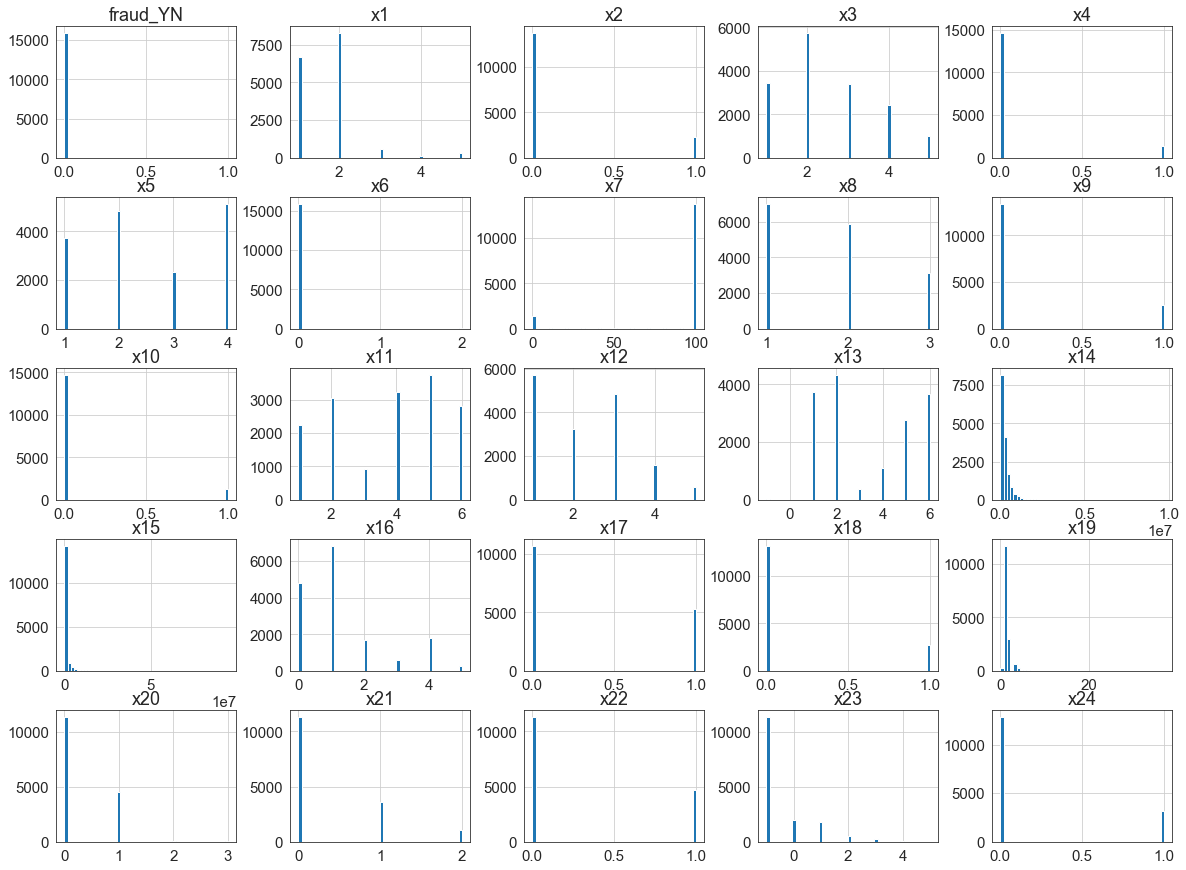

In [21]:
# 전체 컬럼 히스토그램
raw_data.hist(bins=50, figsize=(20,15))
plt.show()

# 3. one-hot encoding

In [22]:
# 데이터 범주화(수치 데이터 제외)

one_hot_col = ['x1', 'x3', 'x5', 'x6',
               'x8', 'x11', 'x12', 'x13',
               'x16', 'x20', 'x23',]
drop_col = ['x7', 'x14', 'x15',
            'x19', 'x24']

In [23]:
drop_df = raw_data.drop(columns=drop_col, axis=1)
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16000 entries, 0 to 15999
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   fraud_YN  16000 non-null  int64
 1   x1        16000 non-null  int64
 2   x2        16000 non-null  int64
 3   x3        16000 non-null  int64
 4   x4        16000 non-null  int64
 5   x5        16000 non-null  int64
 6   x6        16000 non-null  int64
 7   x8        16000 non-null  int64
 8   x9        16000 non-null  int64
 9   x10       16000 non-null  int64
 10  x11       16000 non-null  int64
 11  x12       16000 non-null  int64
 12  x13       16000 non-null  int64
 13  x16       16000 non-null  int64
 14  x17       16000 non-null  int64
 15  x18       16000 non-null  int64
 16  x20       16000 non-null  int64
 17  x21       16000 non-null  int64
 18  x22       16000 non-null  int64
 19  x23       16000 non-null  int64
dtypes: int64(20)
memory usage: 2.6 MB


In [24]:
dum_df = pd.get_dummies(drop_df, columns=one_hot_col)
dum_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16000 entries, 0 to 15999
Data columns (total 63 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   fraud_YN  16000 non-null  int64
 1   x2        16000 non-null  int64
 2   x4        16000 non-null  int64
 3   x9        16000 non-null  int64
 4   x10       16000 non-null  int64
 5   x17       16000 non-null  int64
 6   x18       16000 non-null  int64
 7   x21       16000 non-null  int64
 8   x22       16000 non-null  int64
 9   x1_1      16000 non-null  uint8
 10  x1_2      16000 non-null  uint8
 11  x1_3      16000 non-null  uint8
 12  x1_4      16000 non-null  uint8
 13  x1_5      16000 non-null  uint8
 14  x3_1      16000 non-null  uint8
 15  x3_2      16000 non-null  uint8
 16  x3_3      16000 non-null  uint8
 17  x3_4      16000 non-null  uint8
 18  x3_5      16000 non-null  uint8
 19  x5_1      16000 non-null  uint8
 20  x5_2      16000 non-null  uint8
 21  x5_3      16000 non-null  uint8
 22

### 가설 및 탐색 ('fraud_YN' Y 기준)
- 1. x17
- 2. x8
- 3. x13
- 4. x12
- 5. x16
- 6. x23
- 7. x3
- 8. x5

In [25]:
# 총 사기 건수
len(dum_df[dum_df['fraud_YN'] == 1])

41

In [26]:
# 1. x17 // 전면 18, 후면 6
print(len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x17'] == 1)]),
      len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x18'] == 1)]),)

18 6


In [27]:
# 2. x8 // PF5 25건, PF30 7건, PF70 9건
print(len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x8_1'] == 1)]),
      len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x8_2'] == 1)]),
      len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x8_3'] == 1)]))

25 7 9


In [28]:
# 3. x13
# 21~4시 12건, 17~20시 6건, 5~7시 3건, 8~10시 6건, 11~13시 7건, 14~16시 7건
print(len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x13_1'] == 1)]),
      len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x13_2'] == 1)]),
      len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x13_3'] == 1)]),
      len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x13_4'] == 1)]),
      len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x13_5'] == 1)]),
      len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x13_6'] == 1)]),)

12 6 3 6 7 7


In [29]:
# 4. x12
# 2~5시간 9, 6~9시간 8, 10~36시간 17, 36시간 초과 7, 2시간 미만(0~1) 0건
print(len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x12_1'] == 1)]),
      len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x12_2'] == 1)]),
      len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x12_3'] == 1)]),
      len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x12_4'] == 1)]),
      len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x12_5'] == 1)]))

9 8 17 7 0


In [30]:
# 5. x16
# 주차장 16건, 일반도로 13건, 이면도로 9건, 고속도로 0건, 쏘카존 3건, null(확인불가) 0건
print(len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x16_0'] == 1)]),
      len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x16_1'] == 1)]),
      len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x16_2'] == 1)]),
      len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x16_3'] == 1)]),
      len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x16_4'] == 1)]),
      len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x16_5'] == 1)]))

16 13 9 0 3 0


In [31]:
# 6. x23
# 미확인,etc 22건, 0명 5건, 1명 7건, 2명 6건, 3명 1건, 4명 0건, 5명이상 0건
print(len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x23_-1'] == 1)]),
      len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x23_0'] == 1)]),
      len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x23_1'] == 1)]),
      len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x23_2'] == 1)]),
      len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x23_3'] == 1)]),
      len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x23_4'] == 1)]),
      len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x23_5'] == 1)]))

22 5 7 6 1 0 0


In [32]:
# 7. x3
# 21세 이상 13건, 23세 10건, 27세 11건, 31세 6건, 41세 1건
print(len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x3_1'] == 1)]),
      len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x3_2'] == 1)]),
      len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x3_3'] == 1)]),
      len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x3_4'] == 1)]),
      len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x3_5'] == 1)]))

13 10 11 6 1


In [33]:
# 8. x5
# 1회 14건, 2~5회 7건, 6~10회 6건, 11회 이상 14건
print(len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x5_1'] == 1)]),
      len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x5_2'] == 1)]),
      len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x5_3'] == 1)]),
      len(dum_df[(dum_df['fraud_YN'] == 1) & (dum_df['x5_4'] == 1)]))

14 7 6 14


In [34]:
# 데이터 프레임 저장
# dum_df.to_csv('encoded_data.csv')

# 4. fraud_Y, fraud_N 데이터 나누기

### fraud_Y(사기) 데이터프레임

In [35]:
fraud_Y = raw_data[raw_data['fraud_YN'] == 1]
fraud_Y.reset_index(drop=True, inplace=True)
fraud_Y.tail()

,fraud_YN,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24
36,1,1,0,1,0,4,0,100,2,0,...,0,1,1,0,1,1,1,1,0,0
37,1,2,0,1,0,3,0,100,1,0,...,1281340,1,1,0,2,1,1,1,2,0
38,1,2,0,1,0,1,0,100,1,0,...,0,1,1,0,1,0,0,0,-1,0
39,1,1,0,1,0,1,0,100,3,0,...,263261,1,0,1,1,0,0,0,-1,0
40,1,2,0,1,0,2,0,100,1,0,...,0,1,1,0,1,1,1,1,1,0


In [36]:
# 그래프 가독성을 위한 row 수정

fraud_Y.loc[fraud_Y['x1'] == 1, 'x1'] = '경형/소형'
fraud_Y.loc[fraud_Y['x1'] == 2, 'x1'] = '준/중형'
fraud_Y.loc[fraud_Y['x1'] == 3, 'x1'] = '승합, 준/대형'
fraud_Y.loc[fraud_Y['x1'] == 4, 'x1'] = '수입'
fraud_Y.loc[fraud_Y['x1'] == 5, 'x1'] = 'EV/23RV'

fraud_Y.loc[fraud_Y['x8'] == 1, 'x8'] = 'PF5'
fraud_Y.loc[fraud_Y['x8'] == 2, 'x8'] = 'PF30'
fraud_Y.loc[fraud_Y['x8'] == 3, 'x8'] = 'PF70'

fraud_Y.loc[fraud_Y['x13'] == 1, 'x13'] = '21~4시'
fraud_Y.loc[fraud_Y['x13'] == 2, 'x13'] = '17~20시'
fraud_Y.loc[fraud_Y['x13'] == 3, 'x13'] = '5~7시'
fraud_Y.loc[fraud_Y['x13'] == 4, 'x13'] = '8~10시'
fraud_Y.loc[fraud_Y['x13'] == 5, 'x13'] = '11~13시'
fraud_Y.loc[fraud_Y['x13'] == 6, 'x13'] = '14~16시'

fraud_Y.loc[fraud_Y['x12'] == 1, 'x12'] = '2~5시간'
fraud_Y.loc[fraud_Y['x12'] == 2, 'x12'] = '6~9시간'
fraud_Y.loc[fraud_Y['x12'] == 3, 'x12'] = '10~36시간'
fraud_Y.loc[fraud_Y['x12'] == 4, 'x12'] = '36시간 초과'
fraud_Y.loc[fraud_Y['x12'] == 5, 'x12'] = '2시간 미만'

fraud_Y.loc[fraud_Y['x16'] == 0, 'x16'] = '주차장'
fraud_Y.loc[fraud_Y['x16'] == 1, 'x16'] = '일반도로'
fraud_Y.loc[fraud_Y['x16'] == 2, 'x16'] = '이면도로'
fraud_Y.loc[fraud_Y['x16'] == 3, 'x16'] = '고속도로'
fraud_Y.loc[fraud_Y['x16'] == 4, 'x16'] = '쏘카존'
fraud_Y.loc[fraud_Y['x16'] == 5, 'x16'] = '확인불가'

fraud_Y.loc[fraud_Y['x23'] == -1, 'x23'] = '미확인,etc'
fraud_Y.loc[fraud_Y['x23'] == 0, 'x23'] = '0명'
fraud_Y.loc[fraud_Y['x23'] == 1, 'x23'] = '1명'
fraud_Y.loc[fraud_Y['x23'] == 2, 'x23'] = '2명'
fraud_Y.loc[fraud_Y['x23'] == 3, 'x23'] = '3명'
fraud_Y.loc[fraud_Y['x23'] == 4, 'x23'] = '4명'
fraud_Y.loc[fraud_Y['x23'] == 5, 'x23'] = '5명'

fraud_Y.loc[fraud_Y['x3'] == 1, 'x3'] = '21세 이상'
fraud_Y.loc[fraud_Y['x3'] == 2, 'x3'] = '23세 이상'
fraud_Y.loc[fraud_Y['x3'] == 3, 'x3'] = '27세 이상'
fraud_Y.loc[fraud_Y['x3'] == 4, 'x3'] = '31세 이상'
fraud_Y.loc[fraud_Y['x3'] == 5, 'x3'] = '41세 이상'

fraud_Y.loc[fraud_Y['x5'] == 1, 'x5'] = '1회'
fraud_Y.loc[fraud_Y['x5'] == 2, 'x5'] = '2~5회'
fraud_Y.loc[fraud_Y['x5'] == 3, 'x5'] = '6~10회'
fraud_Y.loc[fraud_Y['x5'] == 4, 'x5'] = '11회 이상'


In [37]:
cols = ['x1', 'x8', 'x13', 'x12', 'x16', 'x23', 'x3', 'x5']
titles = ['x1', 'x8', 'x13', 'x12', 'x16', 'x23', 'x3', 'x5']

In [38]:
sorted(fraud_Y['x1'].unique())

['경형/소형', '승합, 준/대형', '준/중형']

In [39]:
list(zip(cols, sorted(titles)))

[('x1', 'x1'),
 ('x8', 'x12'),
 ('x13', 'x13'),
 ('x12', 'x16'),
 ('x16', 'x23'),
 ('x23', 'x3'),
 ('x3', 'x5'),
 ('x5', 'x8')]

# 4-1 fraud_Y(사기) 데이터 시각화

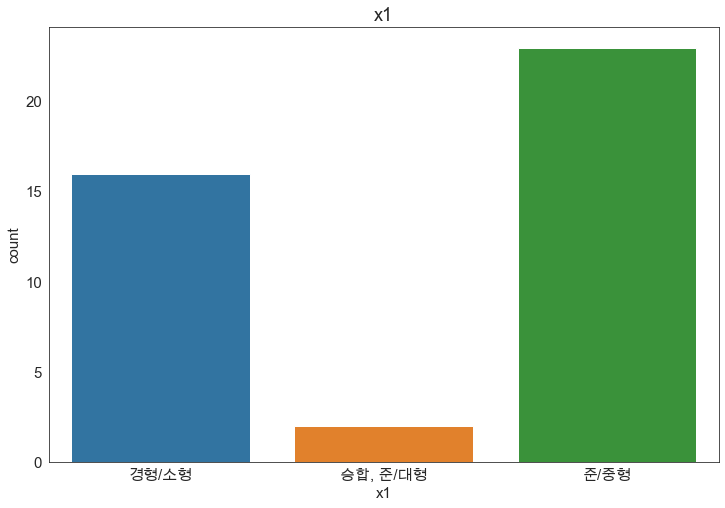

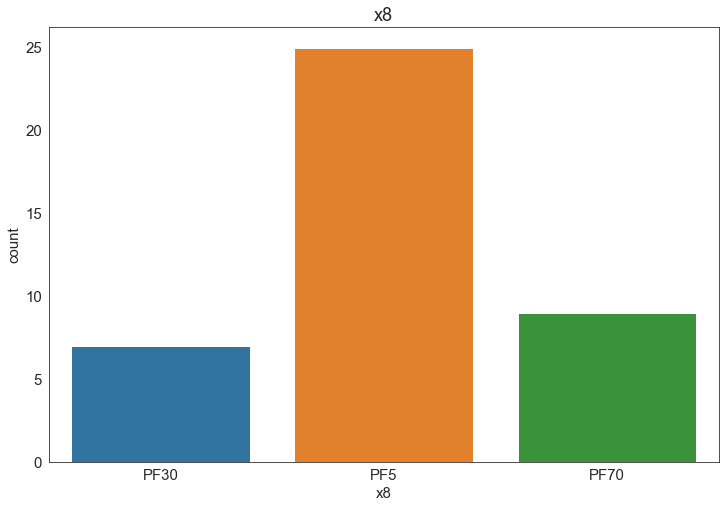

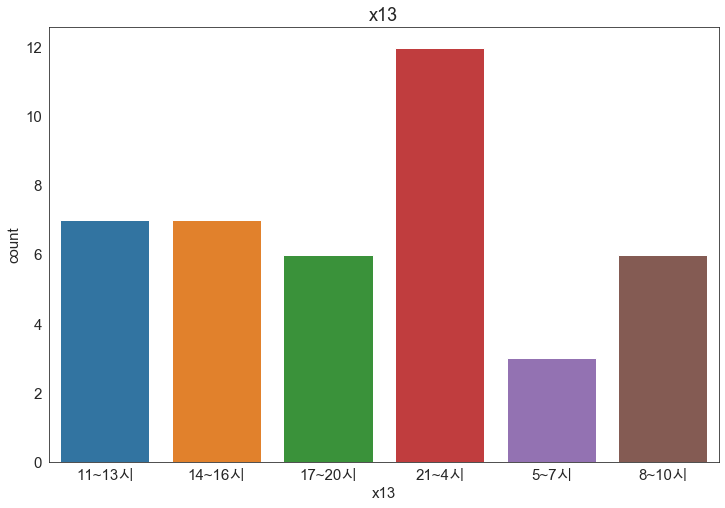

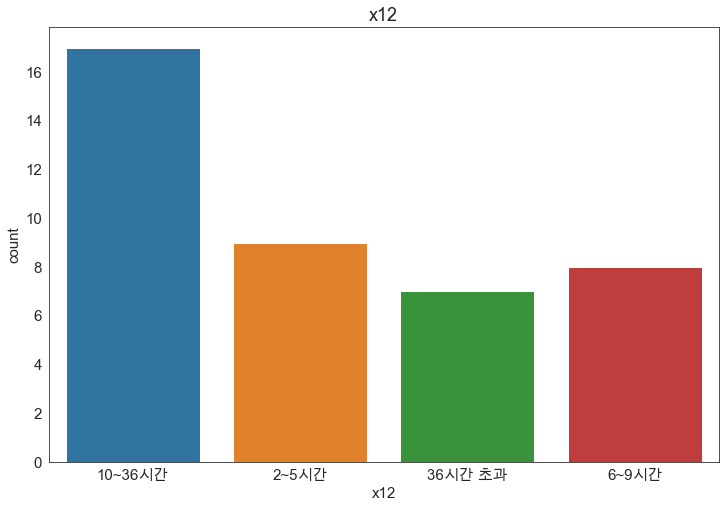

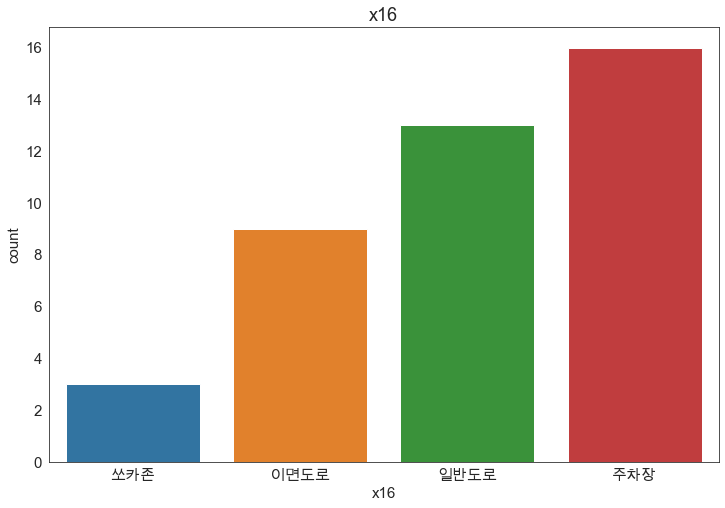

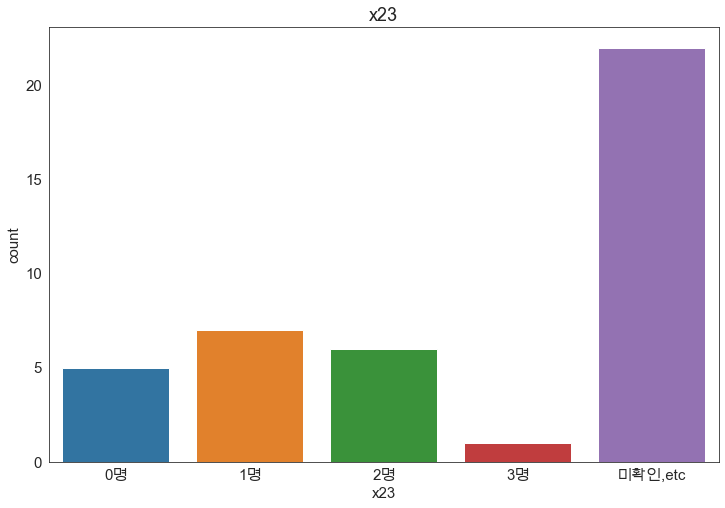

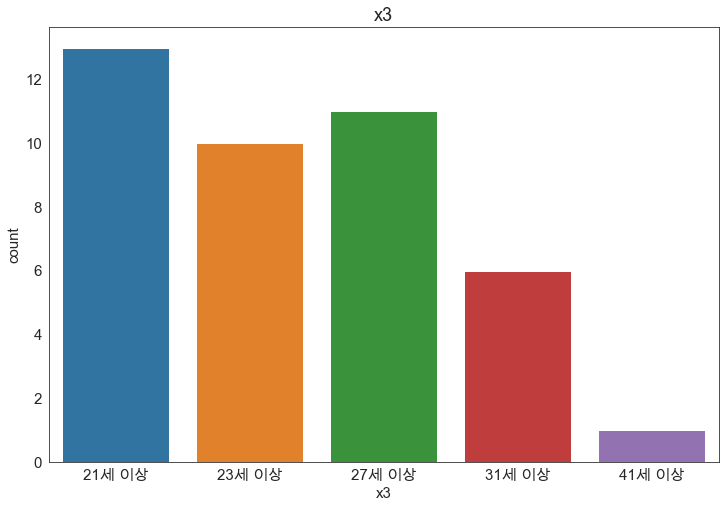

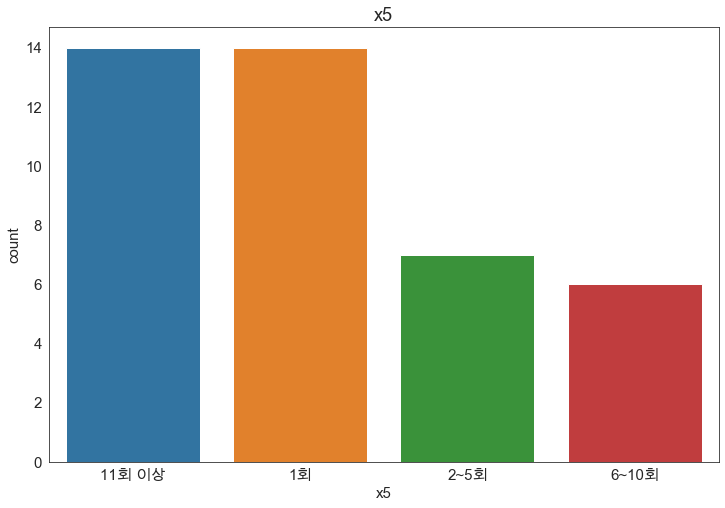

In [40]:
for col, title in list(zip(cols, titles)):
    plt.figure(figsize=(12, 8))
    sns.countplot(x=col, data=fraud_Y, order=sorted(fraud_Y[col].unique()))
    plt.title(title)
#     plt.savefig(f'./fraud_Y_{title}.png', dpi=150, bbox_inches='tight')
    plt.show()

In [41]:
fraud_N = raw_data[raw_data['fraud_YN'] == 0]
fraud_N.reset_index(drop=True, inplace=True)
fraud_N.tail()

,fraud_YN,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24
15954,0,2,0,2,0,2,0,100,2,0,...,0,1,1,0,1,0,0,0,-1,0
15955,0,2,0,2,1,4,0,100,1,1,...,0,2,1,0,1,0,0,0,-1,0
15956,0,2,1,2,0,4,0,100,1,0,...,0,0,0,0,1,0,0,0,-1,1
15957,0,2,0,2,0,2,0,100,2,0,...,0,4,1,0,1,0,0,0,-1,0
15958,0,2,0,2,0,1,0,100,1,0,...,1188750,2,0,0,1,0,0,0,-1,0


In [42]:
# 그래프 가독성을 위한 row 수정

fraud_N.loc[fraud_N['x1'] == 1, 'x1'] = '경형/소형'
fraud_N.loc[fraud_N['x1'] == 2, 'x1'] = '준/중형'
fraud_N.loc[fraud_N['x1'] == 3, 'x1'] = '승합, 준/대형'
fraud_N.loc[fraud_N['x1'] == 4, 'x1'] = '수입'
fraud_N.loc[fraud_N['x1'] == 5, 'x1'] = 'EV/23RV'

fraud_N.loc[fraud_N['x8'] == 1, 'x8'] = 'PF5'
fraud_N.loc[fraud_N['x8'] == 2, 'x8'] = 'PF30'
fraud_N.loc[fraud_N['x8'] == 3, 'x8'] = 'PF70'

fraud_N.loc[fraud_N['x13'] == 1, 'x13'] = '21~4시'
fraud_N.loc[fraud_N['x13'] == 2, 'x13'] = '17~20시'
fraud_N.loc[fraud_N['x13'] == 3, 'x13'] = '5~7시'
fraud_N.loc[fraud_N['x13'] == 4, 'x13'] = '8~10시'
fraud_N.loc[fraud_N['x13'] == 5, 'x13'] = '11~13시'
fraud_N.loc[fraud_N['x13'] == 6, 'x13'] = '14~16시'

fraud_N.loc[fraud_N['x12'] == 1, 'x12'] = '2~5시간'
fraud_N.loc[fraud_N['x12'] == 2, 'x12'] = '6~9시간'
fraud_N.loc[fraud_N['x12'] == 3, 'x12'] = '10~36시간'
fraud_N.loc[fraud_N['x12'] == 4, 'x12'] = '36시간 초과'
fraud_N.loc[fraud_N['x12'] == 5, 'x12'] = '2시간 미만'

fraud_N.loc[fraud_N['x16'] == 0, 'x16'] = '주차장'
fraud_N.loc[fraud_N['x16'] == 1, 'x16'] = '일반도로'
fraud_N.loc[fraud_N['x16'] == 2, 'x16'] = '이면도로'
fraud_N.loc[fraud_N['x16'] == 3, 'x16'] = '고속도로'
fraud_N.loc[fraud_N['x16'] == 4, 'x16'] = '쏘카존'
fraud_N.loc[fraud_N['x16'] == 5, 'x16'] = '확인불가'

fraud_N.loc[fraud_N['x23'] == -1, 'x23'] = '미확인,etc'
fraud_N.loc[fraud_N['x23'] == 0, 'x23'] = '0명'
fraud_N.loc[fraud_N['x23'] == 1, 'x23'] = '1명'
fraud_N.loc[fraud_N['x23'] == 2, 'x23'] = '2명'
fraud_N.loc[fraud_N['x23'] == 3, 'x23'] = '3명'
fraud_N.loc[fraud_N['x23'] == 4, 'x23'] = '4명'
fraud_N.loc[fraud_N['x23'] == 5, 'x23'] = '5명'

fraud_N.loc[fraud_N['x3'] == 1, 'x3'] = '21세 이상'
fraud_N.loc[fraud_N['x3'] == 2, 'x3'] = '23세 이상'
fraud_N.loc[fraud_N['x3'] == 3, 'x3'] = '27세 이상'
fraud_N.loc[fraud_N['x3'] == 4, 'x3'] = '31세 이상'
fraud_N.loc[fraud_N['x3'] == 5, 'x3'] = '41세 이상'

fraud_N.loc[fraud_N['x5'] == 1, 'x5'] = '1회'
fraud_N.loc[fraud_N['x5'] == 2, 'x5'] = '2~5회'
fraud_N.loc[fraud_N['x5'] == 3, 'x5'] = '6~10회'
fraud_N.loc[fraud_N['x5'] == 4, 'x5'] = '11회 이상'

# 4-2 fraud_N 데이터 시각화

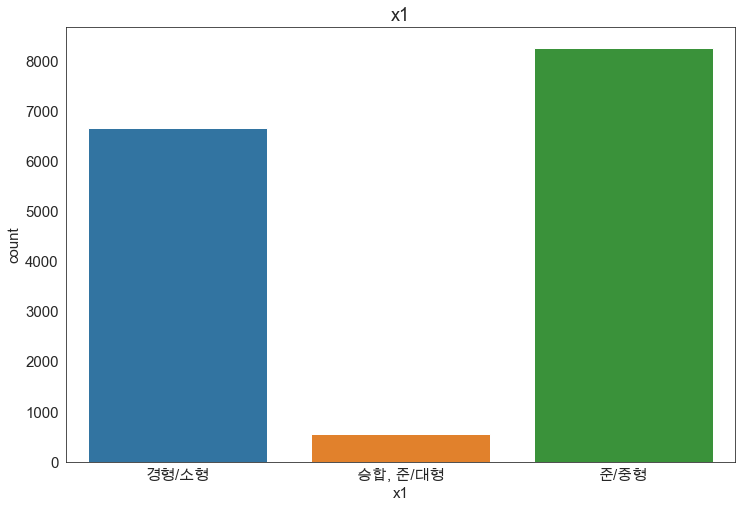

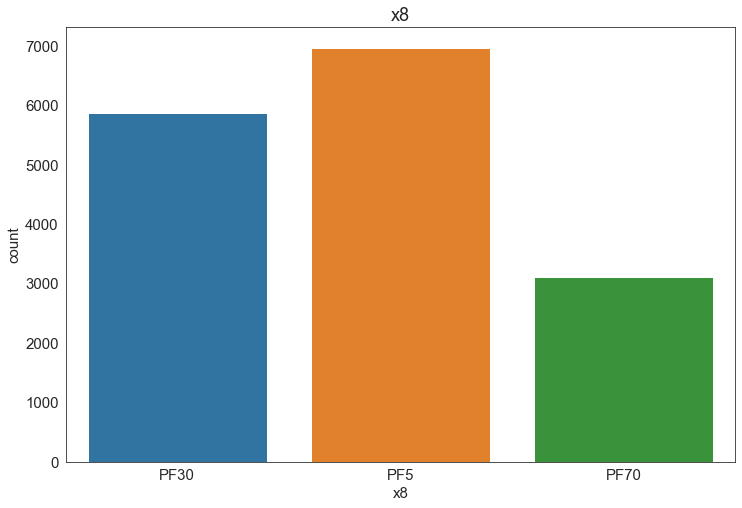

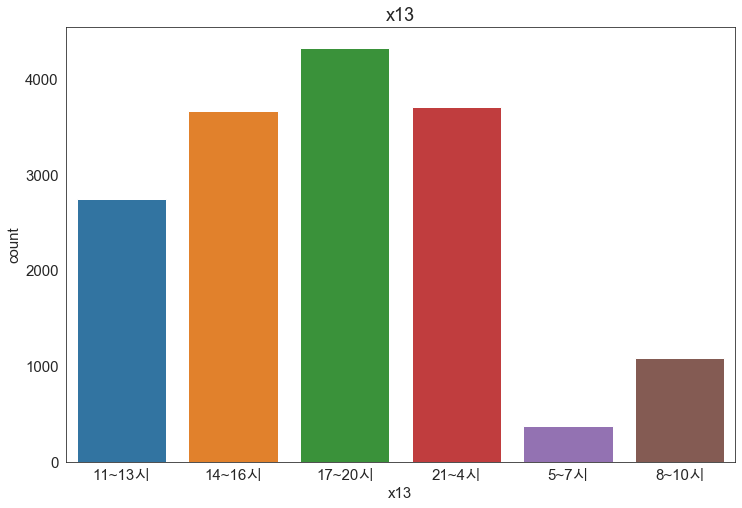

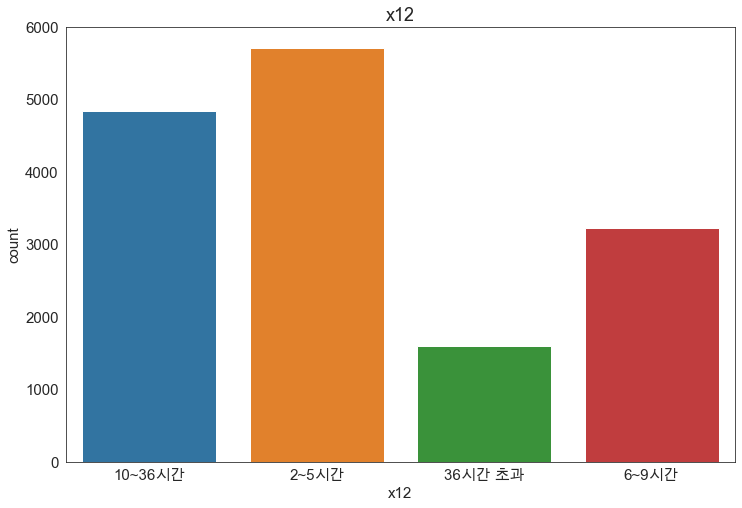

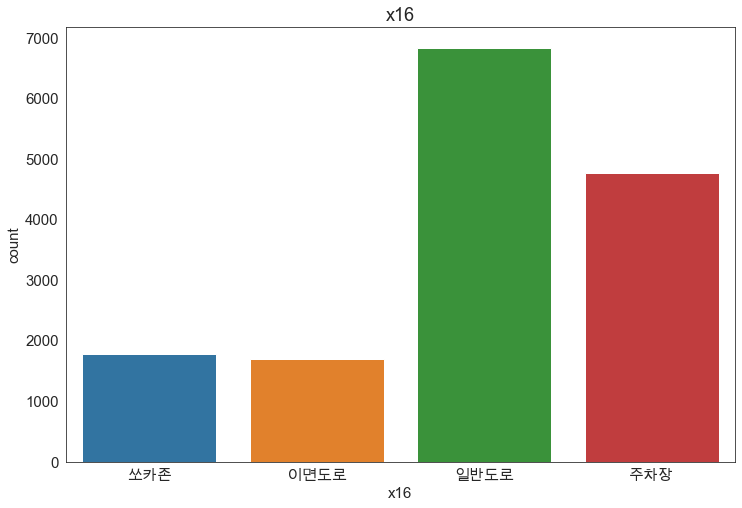

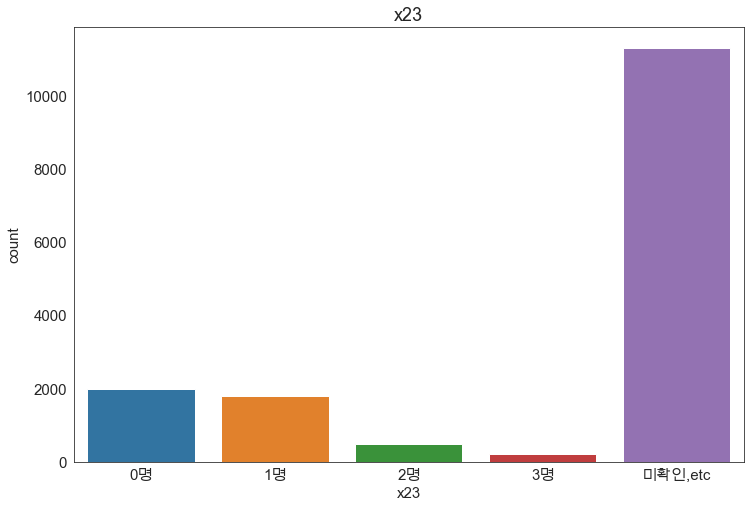

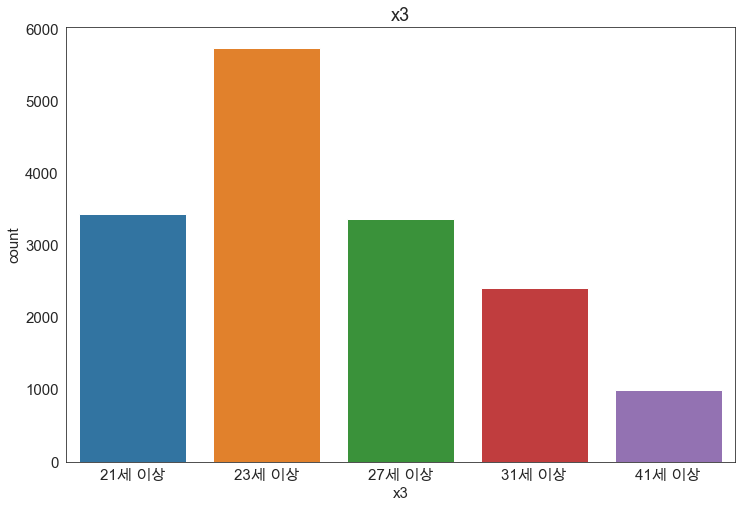

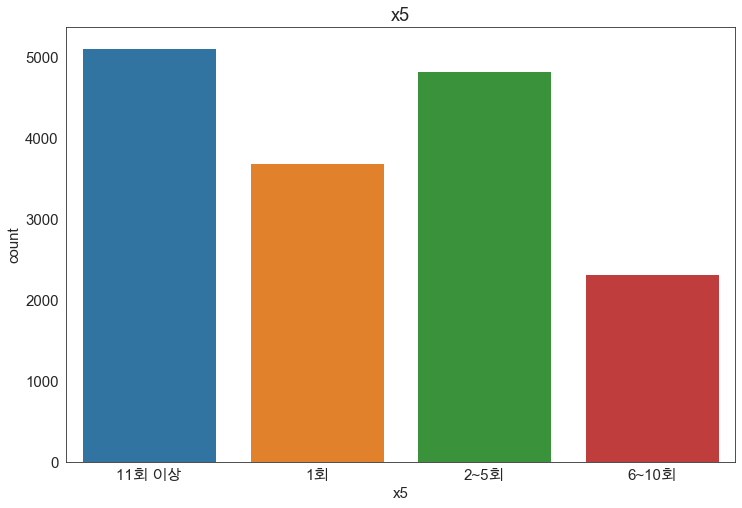

In [43]:
for col, title in list(zip(cols, titles)):
    plt.figure(figsize=(12, 8))
    sns.countplot(x=col, data=fraud_N, order=sorted(fraud_Y[col].unique()))
    plt.title(title)
#     plt.savefig(f'./fraud_N_{title}.png', dpi=150, bbox_inches='tight')
    plt.show()